In [1]:
from chyk import *
handcalcs.set_option("param_columns", 6)

In [107]:
def sfgmk2(n, x0, y0, xlabel, ylabel, t, *args, splots=1, lst='-', c='tab:blue', l=" ", basefmt=" ", grid=1, dim=(10,6), fig=None, fig_offset=0,
          mark_values=None, mark_labels=None, ptype="plot", conf_intervals=None, average=False, bell_curve=False, xmax=None,
          pltshow=1, pltlegend=0, lbs=None,
          **kwargs):
    # Figure Setup
    fig_setup, axs = plt.subplots(splots, 1, figsize=dim)

    # If only one subplot, axs -> list
    if splots == 1:
        axs = [axs]
    if ptype == 'hist':
        pltlegend = 0

    # Bell Curve Fit
    def plot_bell_curve(ax, data):
        mu, std = stats.norm.fit(data)
        xmin, xmax = ax.get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)
        ax.plot(x, p * len(data) * np.diff(ax.get_xticks())[0], 'k--', linewidth=2)

    # Graph Handler Dataset 0
    lst_first = kwargs.get('lst1', lst)
    c_first = kwargs.get('c1', c)
    l_first = kwargs.get('l1', l)

    if ptype == "stem":
        axs[0].stem(x0, y0, basefmt=basefmt, linefmt=lst_first, markerfmt=c_first, label=l_first)
    elif ptype == "hist":
        axs[0].hist(x0, bins=y0, color=c_first)
        if conf_intervals is not None:
            for ci in conf_intervals:
                axs[0].axvline(ci, color='r', linestyle='--', label=f'CI {ci}')
        if average:
            avg = np.mean(x0)
            axs[0].axvline(avg, color='g', linestyle='-', label=f'Average: {avg:.2f}')
        if bell_curve:
            plot_bell_curve(axs[0], x0)
        if xmax is not None:
            axs[0].set_xlim(right=xmax)
    else:
        axs[0].plot(x0, y0, linestyle=lst_first, color=c_first, label=l_first)

    # Main Labels, Dataset 0
    axs[0].set_title(t)
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)
    if grid:
        axs[0].grid(True)

    # Additional Datasets Handler
    if splots>1: # More than 1 plot
        for i in range(1, splots):
            x_data = args[(i - 1) * 5]      # x1, x2, ..., xN
            y_data = args[(i - 1) * 5 + 1]  # y1, y2, ..., yN
            title = args[(i - 1) * 5 + 2]   # title1, title2, ..., titleN
            xlabel = args[(i - 1) * 5 + 3]  # xlabel1, xlabel2, ..., xlabelN
            ylabel = args[(i - 1) * 5 + 4]  # ylabel1, ylabel2, ..., ylabelN

            # Optional Line Style and Color Handler
            lst_key = f'lst{i+1}'
            c_key = f'c{i+1}'
            lst = kwargs.get(lst_key, '-')
            c = kwargs.get(c_key, 'tab:blue')

            if ptype == "stem":
                axs[i].stem(x_data, y_data, basefmt=basefmt, linefmt=c, markerfmt=c)
            elif ptype == "hist":
                axs[i].hist(x_data, bins=y_data, color=c)
                if conf_intervals is not None:
                    for ci in conf_intervals:
                        axs[i].axvline(ci, color='r', linestyle='--', label=f'CI {ci}')
                if average:
                    avg = np.mean(x_data)
                    axs[i].axvline(avg, color='g', linestyle='-', label=f'Average: {avg:.2f}')
                if bell_curve:
                    plot_bell_curve(axs[i], x_data)
                if xmax is not None:
                    axs[i].set_xlim(right=xmax)
            else:
                axs[i].plot(x_data, y_data, linestyle=lst, color=c)

            axs[i].set_title(title)
            axs[i].set_xlabel(xlabel)
            axs[i].set_ylabel(ylabel)
            if grid:
                axs[i].grid(True)
    else:  # One plot
        for i in range(len(args) // 2):
            x_data = args[i * 2]      # x1, x2, ..., xN
            y_data = args[i * 2 + 1]  # y1, y2, ..., yN

            # Optional Line Style and Color Handler
            lst_key = f'lst{i+2}'  # Note: Adjust index to access lst2, lst3, etc.
            c_key = f'c{i+2}'      # Note: Adjust index to access c2, c3, etc.
            lst = kwargs.get(lst_key, '-')
            c = kwargs.get(c_key, 'tab:blue')

            if ptype == "stem":
                axs[0].stem(x_data, y_data, basefmt=basefmt, linefmt=c, markerfmt=c)
            elif ptype == "hist":
                axs[0].hist(x_data, bins=y_data, color=c)
                if conf_intervals is not None:
                    for ci in conf_intervals:
                        axs[0].axvline(ci, color='r', linestyle='--', label=f'CI {ci}')
                if average:
                    avg = np.mean(x_data)
                    axs[0].axvline(avg, color='g', linestyle='-', label=f'Average: {avg:.2f}')
                if bell_curve:
                    plot_bell_curve(axs[0], x_data)
                if xmax is not None:
                    axs[0].set_xlim(right=xmax)
            else:
                axs[0].plot(x_data, y_data, linestyle=lst, color=c)

    # Legends Handler
    if lbs is not None and pltlegend ==1 and ptype != 'hist':
        if ptype == "stem":
            num_datasets = len(args) // 2 + 1 
            dataset_labels = lbs[:num_datasets] 
            for line, lb in zip(axs[0].get_lines()[:num_datasets], dataset_labels):
                line.set_label(lb)
        else:
            if len(lbs) == len(axs[0].get_lines()):
                for line, lb in zip(axs[0].get_lines(), lbs):
                    line.set_label(lb)
            axs[0].legend()

    # Figure Name Handler
    if fig is not None:
        plt.text(0.5, -0.1 * (splots*1.15 + fig_offset), r'$\bf{Figure\ }$' + str(n) + r': ' + str(fig), transform=plt.gca().transAxes,
                 horizontalalignment='center', verticalalignment='center', fontsize=10)

    plt.tight_layout()
    if pltshow == 1:
        plt.show()
    if pltlegend == 1 and splots == 1:
        plt.legend()


In [105]:
# Test case 1: Single plot with two curves
def test_sfgmk2_single_plot_multiple_curves():
    time = np.linspace(0, 2*np.pi, 100)
    x_time = np.sin(time)
    approx_x_time = np.cos(time)
    sfgmk2(1, time, x_time, 'Time', 'Amplitude', 'Comparison of sin(t) and cos(t)', 
            time, approx_x_time,
            lbs=['sin(t)', 'cos(t)'], lst1='-', c1='green', lst2='--', c2='red',
            fig='Comparison of sin(t) and cos(t)')

# Test case 2: Multiple subplots with one curve each
def test_sfgmk2_multiple_subplots():
    time = np.linspace(0, 2*np.pi, 100)
    x_time = np.sin(time)
    approx_x_time = np.cos(time)
    sfgmk2(2, time, x_time, 'Time', 'sin(t)', 'Sin Plot', 
            time, approx_x_time, 'Time', 'cos(t)', 'Cos Plot',
            lst1='-', c1='blue', lst2='--', c2='orange',
            splots=2, fig='Multiple Subplots')

# Test case 3: Histogram feature
def test_sfgmk2_histogram():
    data = np.random.normal(0, 1, 1000)
    sfgmk2(3, data, 30, 'Value', 'Frequency', 'Histogram of Data',
            ptype='hist', fig='Histogram', average=True, pltlegend=1, bell_curve=1)

# Test case 4: Stem plot feature
def test_sfgmk2_stem_plot():
    time = np.linspace(0, 10, 10)
    x_time = np.sin(time)
    sfgmk2(4, time, x_time, 'Time', 'Amplitude', 'Stem Plot of sin(t)',
            ptype='stem', lst1='-', c1='green', fig='Stem Plot', pltlegend=0,lbs=['jim','pam'])
    
# Test case 5: Turn off legend for single plot with multiple curves
def test_sfgmk2_turn_off_legend():
    time = np.linspace(0, 2*np.pi, 100)
    x_time = np.sin(time)
    approx_x_time = np.cos(time)
    sfgmk2(5, time, x_time, 'Time', 'Amplitude', 'Comparison without legend',
            time, approx_x_time, lst1='-', c1='green', lst2='--', c2='red',
            fig='Comparison without Legend', pltlegend=0)


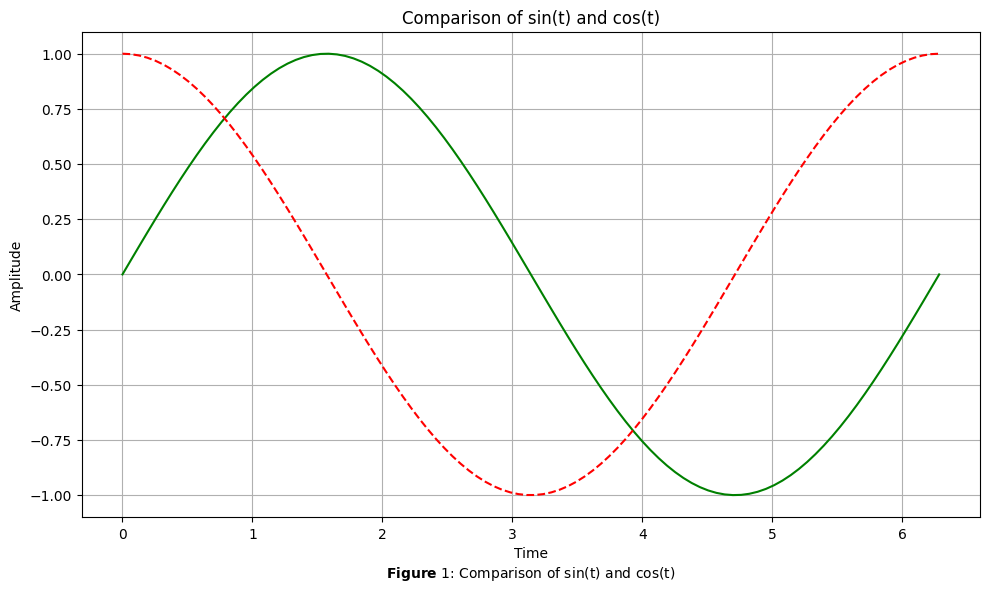

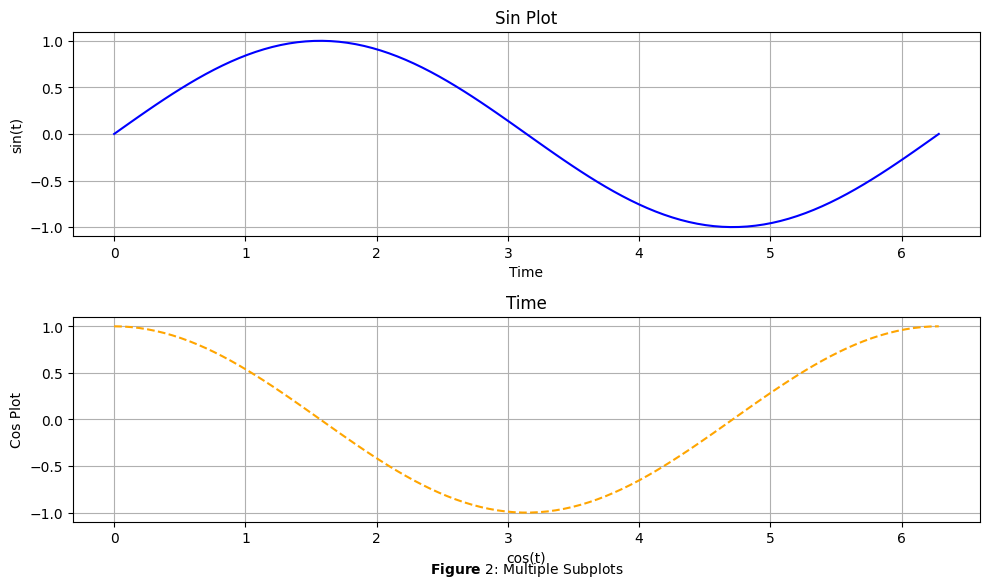

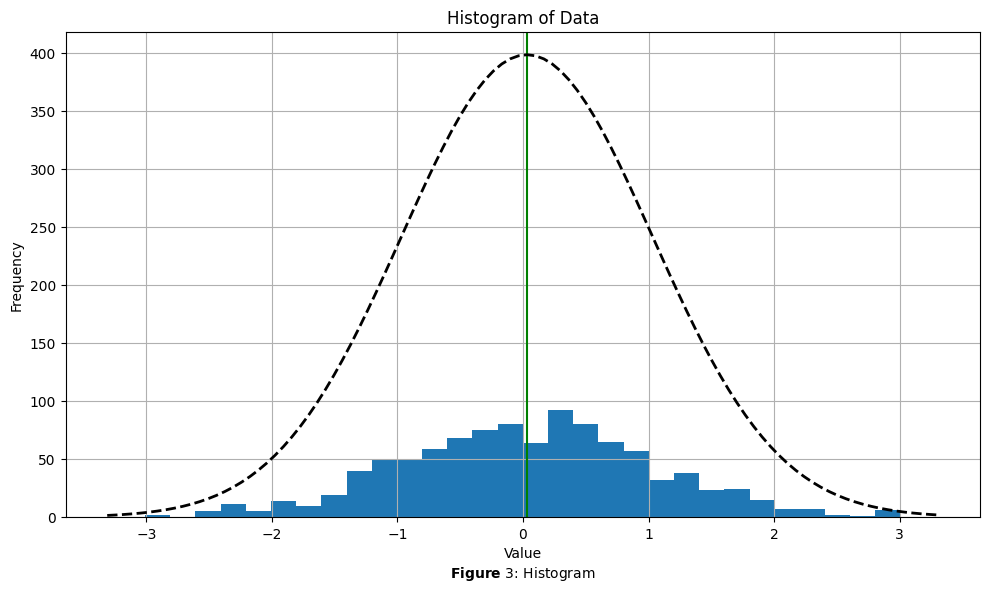

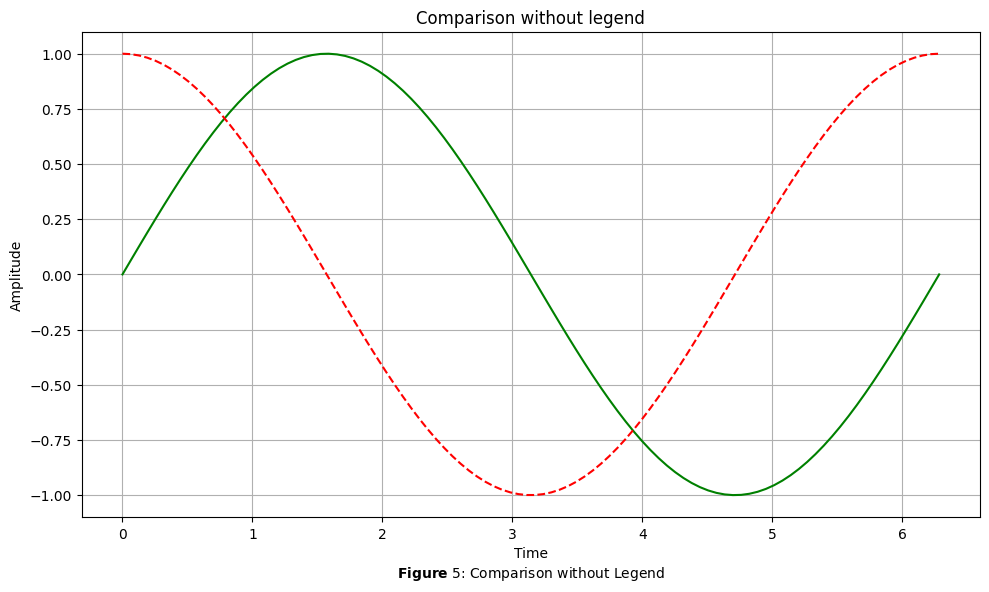

In [109]:
test_sfgmk2_single_plot_multiple_curves()
test_sfgmk2_multiple_subplots()
test_sfgmk2_histogram()
test_sfgmk2_turn_off_legend()

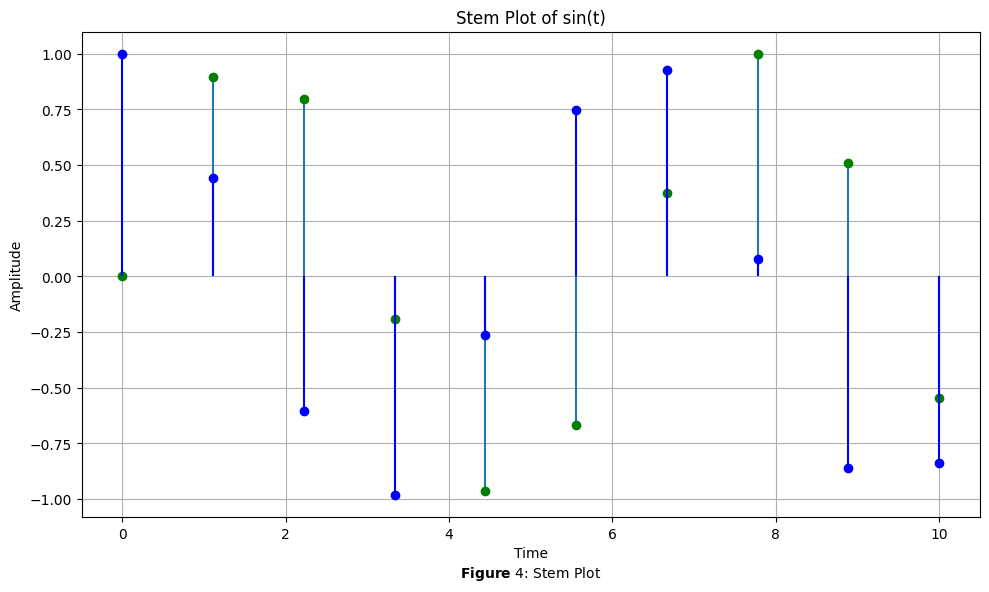

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


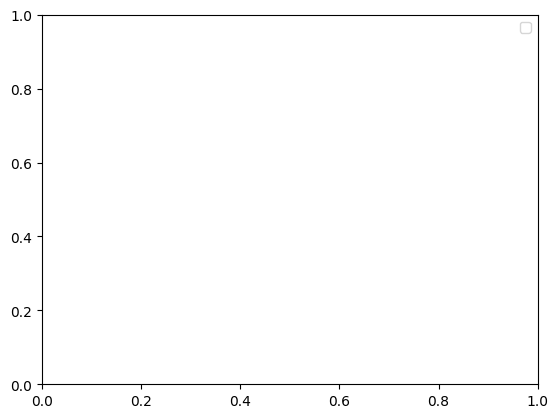

In [111]:
time = np.linspace(0, 10, 10)
x_time = np.sin(time)
sfgmk2(4, time, x_time, 'Time', 'Amplitude', 'Stem Plot of sin(t)',
        time, np.cos(time), # Add another dataset
        ptype='stem', lst1='-', c1='green', lst2='--', c2='blue',
        fig='Stem Plot', pltlegend=1, lbs=['sin(t)', 'cos(t)','sad', 'mehe'])
